<a href="https://colab.research.google.com/github/felixsimard/comp551-p3/blob/main/Felix_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Felix's Notebook for exploring the assignment

In [137]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import pickle
from PIL import Image

In [138]:
# Reference: https://www.youtube.com/watch?v=pDdP0TFzsoQ

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [158]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [139]:
def load_data(filename, data_path='/content/drive/MyDrive/P3-COMP551-FALL2021/'):
    from google.colab import drive
    drive.mount("/content/drive")
    loaded_pkl = None
    try:
        pkl_buffered = open(data_path+''+filename,'rb')
        loaded_pkl = pickle.load(pkl_buffered)
    except Exception as e:
        print("Error loading data: {}".format(e))
    return loaded_pkl
    

In [140]:
# Load data
train_l = load_data("images_l.pkl")
train_ul = load_data("images_ul.pkl")
labels_l = load_data("labels_l.pkl")
test_ul = load_data("images_test.pkl")
print(train_l.shape)
print(labels_l.shape, type(labels_l))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(30000, 56, 56)
(30000, 36) <class 'numpy.ndarray'>


In [141]:
# torch.argmax(torch.Tensor(labels_l), dim=1)

In [142]:
# Reference: https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader
class CustomDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1,2,0))
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [134]:
# Hyper-parameters
NUM_EPOCHS = 4
BATCH_SIZE = 2
LEARNING_RATE = 0.001
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0001

In [143]:
# Tensor, Transform, Datasets, Dataloaders

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Tensor
train_l_tensor = torch.Tensor(train_l)

# labels_l_tensor = torch.Tensor(labels_l)
labels_l_tensor = torch.argmax(torch.Tensor(labels_l), dim=1) # THIS IS KEY FOR THE LABELS

# Datasets
train_l_dataset = TensorDataset(train_l_tensor, labels_l_tensor)
train_l_dataloader = DataLoader(train_l_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Test
test_ul_tensor = torch.Tensor(test_ul)
test_labels = torch.Tensor(np.zeros(len(test_ul)))
test_ul_dataset = TensorDataset(test_ul_tensor, test_labels)
test_ul_dataloader = DataLoader(test_ul_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [144]:
# dataiter = iter(train_l_dataloader)
# images, labels = dataiter.next()

# print(images.shape)
# print(labels.shape)

In [145]:
# Define labels
# Consider upper case and lower case letters?
labels = []
for l in range(26):
    letter_str = [0.0 for i in range(26)]
    letter_str[l] = 1.0
    for d in range(10):
        digits_str = [0.0 for j in range(10)]
        digits_str[d] = 1.0
        c = digits_str + letter_str
        # c = "".join(c_str)
        labels.append(c)
print(labels[:5])
print(len(labels))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
260


In [146]:
# Implement CONV Net

class ConvNet(nn.Module):
    def __init__(self, in_channels=1, num_classes=260):
        super(ConvNet, self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        # self.model = torchvision.models.resnet34(pretrained=False)
        self.conv1 = nn.Conv2d(in_channels, 6, 5) # input channel (rgb), output channel, kernel size 
        self.pool = nn.MaxPool2d(2, 2) # define 2x2 stride for max-pooling
        self.conv2 = nn.Conv2d(6, 16, 5) # input channel size = output channel size of previous conv layer
        self.fc1 = nn.Linear(16*11*11, 120) # fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)   
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # activation function does not change size
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*11*11) # -1 tells PyTorch to infer num batches # flatten tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # no activation at end, softmax included in CrossEntropyLoss
        return x





In [147]:
# Test model flow
model_test = ConvNet()
x = torch.randn(2, 1, 56, 56)
print(model_test(x).shape)

torch.Size([2, 260])


In [148]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss() # includes softmax
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

n_total_steps = len(train_l_dataloader)

for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(train_l_dataloader, 0):
        # get inputs, data is a list of [inputs, labels]
        inputs = data[0].to(device)[None, :]
        inputs = inputs.permute(1, 0, 2, 3)
        labels = data[1].to(device)

        # print("Inputs:", inputs.shape)
        # print("labels:", labels)
        # print("labels:", labels.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i+1) % 100 == 0: # print every 1000 mini-batches
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{len(train_l_dataloader)}], Loss: {loss.item():.4f}')
            running_loss = 0.0
        

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/4], Step [100/7500], Loss: 1.9016
Epoch [1/4], Step [200/7500], Loss: 2.8673
Epoch [1/4], Step [300/7500], Loss: 2.6712
Epoch [1/4], Step [400/7500], Loss: 2.1358
Epoch [1/4], Step [500/7500], Loss: 2.3006
Epoch [1/4], Step [600/7500], Loss: 2.3604
Epoch [1/4], Step [700/7500], Loss: 1.9170


KeyboardInterrupt: ignored

In [ ]:
# Predict 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


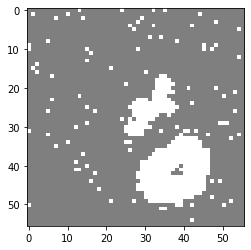

In [166]:
images, labels = next(iter(test_ul_dataloader))
imshow(torchvision.utils.make_grid(images[0]))

In [153]:
with torch.no_grad():
    for data in test_ul_dataloader:
        images, labels = data
        images = data[0].to(device)[None, :]
        images = images.permute(1, 0, 2, 3)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)


tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 6, 3])
tensor([3, 3, 8, 3])
tensor([3, 3, 3, 6])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([7, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 6])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 6])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([6, 6, 3, 3])
tensor([3, 3, 3, 3])
tensor([6, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3, 3, 3])
tensor([3, 3,

tensor([3, 7, 3, 3])